<a href="https://colab.research.google.com/github/Javed0727/Employee-Detail-/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding,LSTM

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df=pd.read_csv('/content/drive/MyDrive/review (1).csv')

In [6]:
df.sample(5)

,Unnamed: 0,review,sentiment
780,780,The Foreigner is not worth one second of your ...,0
684,684,There are many continuity errors: one other us...,0
746,746,"Aailiyah was pretty good as Akasha, in places ...",1
755,755,This early film from future goremeister Lucio ...,1
792,792,This mostly routine fact-based TV drama gets a...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  999 non-null    int64 
 1   review      999 non-null    object
 2   sentiment   999 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.5+ KB


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.sample(5)

,review,sentiment
554,I thought it was bad.,0
507,What this film lacks is a convincing script.,0
223,The flat reenactments don't hold your attentio...,0
487,I particularly remember my senses being assaul...,0
354,I must say I have taped most of the episodes a...,1


In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

In [12]:
def clean_sent(text):
  #tokanization and case conversion
  text1=text.lower()
  token=word_tokenize(text1)
  #removing non alpha charector
  ftoken=[i for i in token if i.isalpha()]
  #ftoken will give a list
  sw=stopwords.words('english')
  stokens=[i for i in ftoken if i not in sw]
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stokens]
  #joining all tokens
  return " ".join(ltoken)


In [13]:
df['review']=df['review'].astype(str)

In [14]:
df["clean_review"]=df["review"].apply(clean_sent)

In [15]:
x=df['clean_review']
y=df['sentiment']


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
sentlen=[]
for sent in df["clean_review"]:
  sentlen.append(len(word_tokenize(sent)))


In [19]:
df['sentlen']=sentlen
df.head()

,review,sentiment,clean_review,sentlen
0,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,8
1,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,17
2,Very little music or anything to speak of.,0,little music anything speak,4
3,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,10
4,"The rest of the movie lacks art, charm, meanin...",0,rest movie lack art charm meaning emptiness wo...,10


In [20]:
  max(sentlen)

38

In [21]:
np.quantile(sentlen,0.97)

20.0

In [22]:
max_len=df['sentlen'].max()

In [23]:
max_len

38

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

In [25]:
tok = Tokenizer(char_level=False, split=" ")

In [26]:
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'character',
 5: 'bad',
 6: 'like',
 7: 'time',
 8: 'good',
 9: 'even',
 10: 'acting',
 11: 'great',
 12: 'scene',
 13: 'well',
 14: 'really',
 15: 'see',
 16: 'story',
 17: 'best',
 18: 'made',
 19: 'actor',
 20: 'make',
 21: 'plot',
 22: 'work',
 23: 'wonderful',
 24: 'better',
 25: 'look',
 26: 'ever',
 27: 'thing',
 28: 'could',
 29: 'also',
 30: 'love',
 31: 'way',
 32: 'real',
 33: 'seen',
 34: 'part',
 35: 'would',
 36: 'think',
 37: 'performance',
 38: 'get',
 39: 'excellent',
 40: 'much',
 41: 'year',
 42: 'nothing',
 43: 'anyone',
 44: 'script',
 45: 'line',
 46: 'never',
 47: 'funny',
 48: 'little',
 49: 'watch',
 50: 'recommend',
 51: 'cast',
 52: 'life',
 53: 'man',
 54: 'music',
 55: 'go',
 56: 'watching',
 57: 'stupid',
 58: 'many',
 59: 'two',
 60: 'lot',
 61: 'people',
 62: 'awful',
 63: 'terrible',
 64: 'worth',
 65: 'pretty',
 66: 'still',
 67: 'art',
 68: 'saw',
 69: 'give',
 70: 'worse',
 71: 'interesting',
 72: 'waste',
 73:

In [27]:
vocab_len=len(tok.index_word)
vocab_len

2101

In [28]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain

[[416, 743, 276, 744, 417, 418, 745, 197],
 [277, 1],
 [278, 746],
 [152,
  747,
  748,
  16,
  62,
  749,
  419,
  279,
  420,
  750,
  751,
  752,
  753,
  122,
  198,
  280,
  199,
  2,
  421,
  153,
  754,
  755,
  422,
  756,
  757,
  758],
 [1, 105, 123, 12, 48, 124],
 [759, 12, 63, 760, 125, 6, 41, 200, 761, 762, 106, 763, 764, 765, 281],
 [766, 282, 36, 3, 17, 1, 26],
 [28, 767, 9, 49, 126, 423, 768],
 [5, 74, 64, 127, 283],
 [1, 29, 424],
 [1, 284],
 [285, 769, 286, 287],
 [65, 425, 23, 2, 18, 426, 201, 770, 771, 772, 773, 107, 202, 276, 7],
 [203, 75, 24, 774, 775, 75, 776, 777, 778, 24, 779, 152],
 [204, 780, 86, 7, 87, 50, 781],
 [30, 782, 1, 154, 1, 3, 427, 31],
 [155, 783, 288, 17, 428, 7],
 [32, 76, 22, 784, 785, 786, 12, 88, 787, 22, 26, 33],
 [156, 8, 205, 89, 289, 429, 430, 206, 788],
 [66, 431, 38, 5],
 [67, 157, 290, 789, 291, 790, 791],
 [292, 792, 62, 793, 432, 128, 794, 795, 796, 797, 798, 799, 281],
 [51, 11],
 [433],
 [434, 435, 800, 4, 207, 801, 208, 802],
 [6

In [29]:
seqmattrain= sequence.pad_sequences(seqtrain, maxlen= int(max_len)) #step2
seqmattrain

array([[  0,   0,   0, ..., 418, 745, 197],
       [  0,   0,   0, ...,   0, 277,   1],
       [  0,   0,   0, ...,   0, 278, 746],
       ...,
       [  0,   0,   0, ...,   9,  32,   1],
       [  0,   0,   0, ...,  73,  28,  55],
       [  0,   0,   0, ...,   0, 341, 678]], dtype=int32)

In [30]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))

In [31]:
vocab_len

2101

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding,LSTM


In [33]:
rnn = Sequential()
rnn.add(Embedding(vocab_len+1,30, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation="sigmoid"))
rnn.compile(optimizer="adam", loss="binary_crossentropy")
rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

Epoch 1/50
14/14 [==============================] - 3s 31ms/step - loss: 0.6943
Epoch 2/50
14/14 [==============================] - 0s 30ms/step - loss: 0.6570
Epoch 3/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5894
Epoch 4/50
14/14 [==============================] - 0s 30ms/step - loss: 0.4379
Epoch 5/50
14/14 [==============================] - 0s 31ms/step - loss: 0.2618
Epoch 6/50
14/14 [==============================] - 0s 30ms/step - loss: 0.1464
Epoch 7/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0900
Epoch 8/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0604
Epoch 9/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0429
Epoch 10/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0323
Epoch 11/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0275
Epoch 12/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0219
Epoch 13/50
14/14 [==================

<Axes: >

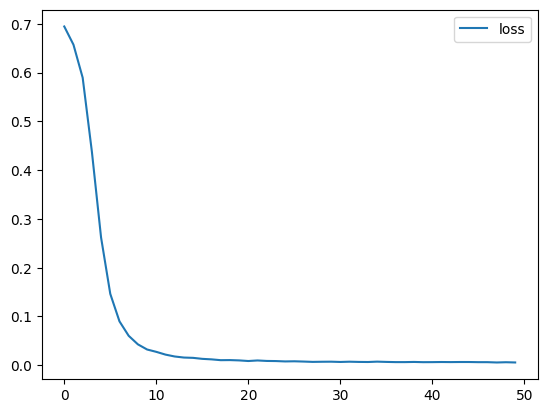

In [34]:
pd.DataFrame(rnn.history.history).plot()

In [42]:
ypred=rnn.predict(seqmattest)

10/10 [==============================] - 0s 8ms/step


In [36]:
ypred=ypred>0.5
ypred=np.where(ypred>0.5,1,0)
ypred


array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       151
           1       0.65      0.67      0.66       149

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300



In [38]:
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding,LSTM


In [39]:
lstm = Sequential()
lstm.add(Embedding(vocab_len+1,38, input_length=int(max_len), mask_zero=True))
lstm.add(LSTM(units=40, activation="tanh"))
lstm.add(Dense(units=40, activation="relu"))
#lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, activation="sigmoid"))
lstm.compile(optimizer="adam", loss="binary_crossentropy")
lstm.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

Epoch 1/50
14/14 [==============================] - 5s 46ms/step - loss: 0.6927
Epoch 2/50
14/14 [==============================] - 1s 58ms/step - loss: 0.6843
Epoch 3/50
14/14 [==============================] - 1s 58ms/step - loss: 0.6378
Epoch 4/50
14/14 [==============================] - 1s 58ms/step - loss: 0.4842
Epoch 5/50
14/14 [==============================] - 1s 60ms/step - loss: 0.3026
Epoch 6/50
14/14 [==============================] - 1s 61ms/step - loss: 0.1789
Epoch 7/50
14/14 [==============================] - 1s 44ms/step - loss: 0.1311
Epoch 8/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0855
Epoch 9/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0798
Epoch 10/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0532
Epoch 11/50
14/14 [==============================] - 1s 48ms/step - loss: 0.0396
Epoch 12/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0400
Epoch 13/50
14/14 [==================

In [41]:
ypred1=lstm.predict(seqmattest)

10/10 [==============================] - 0s 19ms/step


In [43]:
ypred1=ypred1>0.5
ypred1=np.where(ypred1>0.5,1,0)
ypred1

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       151
           1       0.72      0.72      0.72       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

